# **Cartpole**

In [1]:
from stable_baselines3 import PPO, DQN, A2C
import gymnasium as gym
from stable_baselines3.common.logger import configure
from stable_baselines3.common.evaluation import evaluate_policy
import pandas as pd
import matplotlib.pyplot as plt

## A2C 

In [2]:
tmp_path = "./results/cartpole/A2C/"
new_logger = configure(tmp_path, ["stdout", "csv"])

env = gym.make("CartPole-v1")
model = A2C(policy = "MlpPolicy", env = env, device="cpu")

model.set_logger(new_logger)
model.learn(total_timesteps=300_000)

mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)
print(f'Mean reward: {mean_reward} +/- {std_reward:.2f}')

print('modelo treinado')

Logging to ./results/cartpole/A2C/
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 22.6     |
|    ep_rew_mean        | 22.6     |
| time/                 |          |
|    fps                | 2510     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.687   |
|    explained_variance | -0.0396  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 1.88     |
|    value_loss         | 8.32     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 22.3     |
|    ep_rew_mean        | 22.3     |
| time/                 |          |
|    fps                | 2862     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 1000     |
| t

In [34]:
env = gym.make("CartPole-v1", render_mode='human')
(obs,_) = env.reset()
for i in range(1000):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    env.render()
    if done:
      obs = env.reset()

2025-04-02 21:39:25.536 Python[23167:2406258] +[IMKClient subclass]: chose IMKClient_Modern
2025-04-02 21:39:25.536 Python[23167:2406258] +[IMKInputSession subclass]: chose IMKInputSession_Modern


KeyboardInterrupt: 

In [ ]:
model.save("./model/cartpole/A2C_CartPole")

## Learning Curve Graph

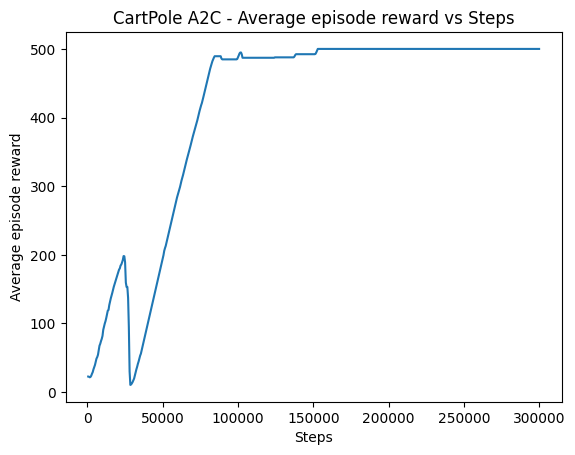

In [6]:
df = pd.read_csv("results/cartpole/A2C/progress.csv")

df.head()

plt.plot(df['time/total_timesteps'], df['rollout/ep_rew_mean'])
plt.xlabel('Steps')
plt.ylabel('Average episode reward')
plt.title('CartPole A2C - Average episode reward vs Steps')
plt.savefig('graphs/cartpole/A2C_cartpole.png')
plt.show()

## DQN 

### Our Previous Hyperparameters

In [18]:
tmp_path = "./results/cartpole/DQN/"
new_logger = configure(tmp_path, ["stdout", "csv"])

env = gym.make("CartPole-v1")
model = DQN(
    policy = "MlpPolicy",
    env = env,
    device="cpu",
    learning_rate=0.001,
    buffer_size=10_000,
    batch_size=64,
    gamma=0.99,
    target_update_interval=100,
    exploration_fraction=1.5e-3, # explicar de onde veio, aqui é linear, no nosso era expo
    exploration_initial_eps=1.0,
    exploration_final_eps=0.01   
)

            
model.set_logger(new_logger)
model.learn(total_timesteps=300_000)

mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)
print(f'Mean reward: {mean_reward} +/- {std_reward:.2f}')

print('modelo treinado')

Logging to ./results/cartpole/DQN/
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19       |
|    ep_rew_mean      | 19       |
|    exploration_rate | 0.833    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 24429    |
|    time_elapsed     | 0        |
|    total_timesteps  | 76       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 16.6     |
|    exploration_rate | 0.707    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 7644     |
|    time_elapsed     | 0        |
|    total_timesteps  | 133      |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.372    |
|    n_updates        | 8        |
----------------------------------
----------------------------------
| rollout/          

In [ ]:
model.save("./model/cartpole/DQN_CartPole_Our_Hyperparameters")

In [19]:
env = gym.make("CartPole-v1", render_mode='human')
(obs,_) = env.reset()
for i in range(1000):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    env.render()
    if done:
      obs = env.reset()

ValueError: You have passed a tuple to the predict() function instead of a Numpy array or a Dict. You are probably mixing Gym API with SB3 VecEnv API: `obs, info = env.reset()` (Gym) vs `obs = vec_env.reset()` (SB3 VecEnv). See related issue https://github.com/DLR-RM/stable-baselines3/issues/1694 and documentation for more information: https://stable-baselines3.readthedocs.io/en/master/guide/vec_envs.html#vecenv-api-vs-gym-api

### Tuned Hyperparameters from: https://github.com/DLR-RM/rl-baselines3-zoo/blob/master/hyperparams/dqn.yml

In [10]:
tmp_path = "./results/cartpole/DQN/"
new_logger = configure(tmp_path, ["stdout", "csv"])

env = gym.make("CartPole-v1")
model = DQN(policy="MlpPolicy",
    env=env,
    device="cpu",
    learning_rate=2.3e-3,
    batch_size=64,
    buffer_size=100_000,
    learning_starts=1000,
    gamma=0.99,
    target_update_interval=10,
    train_freq=256,
    gradient_steps=128,
    exploration_fraction=0.16,
    exploration_final_eps=0.04,
    policy_kwargs=dict(net_arch=[256, 256]),
)
            
model.set_logger(new_logger)
model.learn(total_timesteps=100_000)

mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)
print(f'Mean reward: {mean_reward} +/- {std_reward:.2f}')

print('modelo treinado')

Logging to ./results/cartpole/DQN/
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23       |
|    ep_rew_mean      | 23       |
|    exploration_rate | 0.994    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 8795     |
|    time_elapsed     | 0        |
|    total_timesteps  | 92       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.9     |
|    ep_rew_mean      | 21.9     |
|    exploration_rate | 0.989    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 10092    |
|    time_elapsed     | 0        |
|    total_timesteps  | 175      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.4     |
|    ep_rew_mean      | 26.4     |
|    exploration_rate | 0.981    |
| time/             

In [11]:
model.save("./model/cartpole/DQN_CartPole_Tunned_Hyperparameters")

In [17]:
env = gym.make("CartPole-v1", render_mode='human')
(obs,_) = env.reset()
for i in range(1000):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    env.render()
    if done:
      obs = env.reset()

ValueError: You have passed a tuple to the predict() function instead of a Numpy array or a Dict. You are probably mixing Gym API with SB3 VecEnv API: `obs, info = env.reset()` (Gym) vs `obs = vec_env.reset()` (SB3 VecEnv). See related issue https://github.com/DLR-RM/stable-baselines3/issues/1694 and documentation for more information: https://stable-baselines3.readthedocs.io/en/master/guide/vec_envs.html#vecenv-api-vs-gym-api

## Learning Curve Graphs

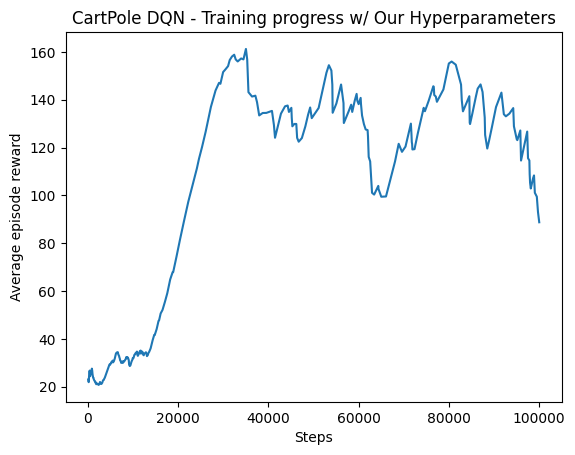

In [14]:
df = pd.read_csv("results/cartpole/DQN/progress.csv")

df.head()

plt.plot(df['time/total_timesteps'], df['rollout/ep_rew_mean'])
plt.xlabel('Steps')
plt.ylabel('Average episode reward')
plt.title('CartPole DQN - Training progress w/ Our Hyperparameters')
plt.savefig('graphs/cartpole/DQN_cartpole_our_hyper.png')
plt.show()

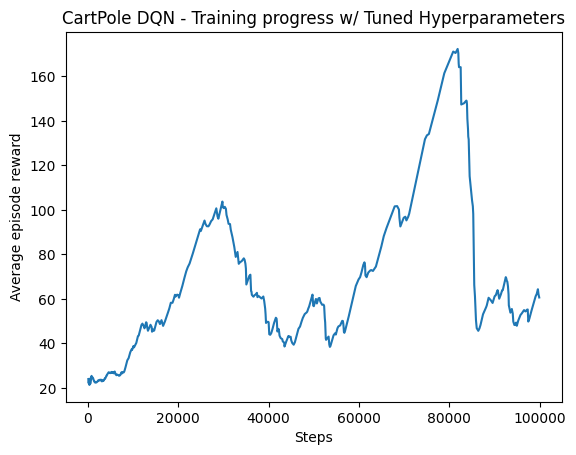

In [15]:
df = pd.read_csv("results/cartpole/DQN/progress_tuned_hyper.csv")

df.head()

plt.plot(df['time/total_timesteps'], df['rollout/ep_rew_mean'])
plt.xlabel('Steps')
plt.ylabel('Average episode reward')
plt.title('CartPole DQN - Training progress w/ Tuned Hyperparameters')
plt.savefig('graphs/cartpole/DQN_cartpole_tunned_hyper.png')
plt.show()